In [52]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [53]:
#Load dataset
df = pd.read_csv("/content/Employee-Attrition - Employee-Attrition.csv")

In [54]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,NaN
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,NaN
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,NaN
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,NaN


In [55]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})

In [56]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [57]:
# checking for missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [58]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Unnamed: 35'],
      dtype='object')

In [59]:
#LabelEncoder Method
from sklearn.preprocessing import LabelEncoder

categorical_col = df.select_dtypes(include='object').columns

In [60]:
categorical_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [61]:
encoders = {}

for col in categorical_col:
  encoders[col] = LabelEncoder()
  df[col] = encoders[col].fit_transform(df[col])

In [62]:
encoders

{'BusinessTravel': LabelEncoder(),
 'Department': LabelEncoder(),
 'EducationField': LabelEncoder(),
 'Gender': LabelEncoder(),
 'JobRole': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'Over18': LabelEncoder(),
 'OverTime': LabelEncoder()}

**Logistic Regression**


```
# This is formatted as code
```



In [63]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,NaN
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,NaN
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,NaN
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,80,1,17,3,3,5,2,0,3,NaN
1466,39,0,2,613,1,6,1,3,1,2062,...,80,1,9,5,3,7,7,1,7,NaN
1467,27,0,2,155,1,4,3,1,1,2064,...,80,1,6,0,3,6,2,0,3,NaN
1468,49,0,1,1023,2,2,3,3,1,2065,...,80,0,17,3,2,9,6,0,8,NaN


In [64]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Unnamed: 35'],
      dtype='object')

In [65]:
x = df[['Age', 'Department', 'MaritalStatus', 'OverTime', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'YearsAtCompany']]
y = df['Attrition']

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42)

In [67]:
#load a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [68]:
lr.score(x_test,y_test)

0.8707482993197279

**StandardScaler**

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)

lr.score(x_test_scaled,y_test)

0.8605442176870748

**cross_val_score**

In [70]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation to check model performance
cv_scores = cross_val_score(lr, x_test_scaled, y_test, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Cross-validation scores: [0.86440678 0.86440678 0.84745763 0.86440678 0.87931034]
Mean CV score: 0.8639976621858562


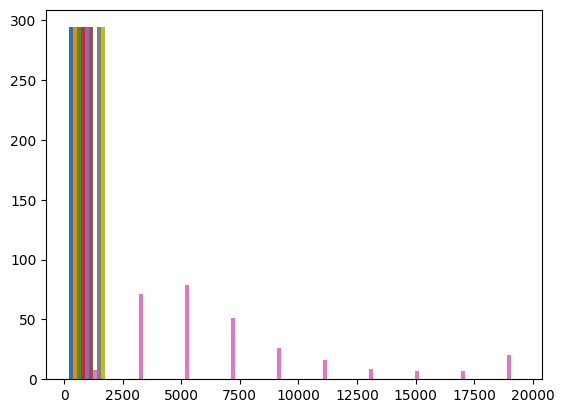

In [71]:
plt.hist(x_test)
plt.show()

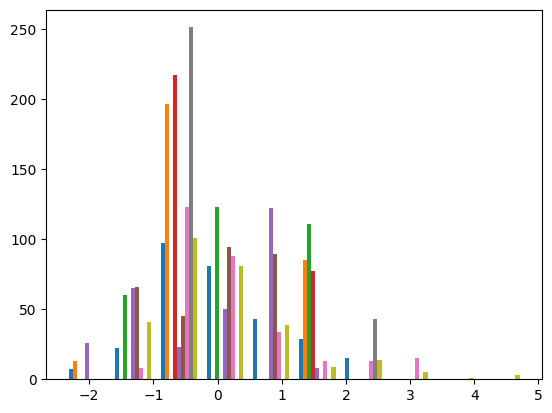

In [72]:
plt.hist(x_test_scaled)
plt.show()

In [73]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

acc

0.8435374149659864

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8435374149659864
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.29      0.13      0.18        39

    accuracy                           0.84       294
   macro avg       0.59      0.54      0.55       294
weighted avg       0.80      0.84      0.82       294



In [50]:
import pickle
filename = 'Employee-Attrition.pkl'
pickle.dump(model, open(filename, 'wb'))

In [51]:
liver_model = pickle.load(open('Employee-Attrition.pkl', 'rb'))